In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
vec_train = vec.fit_transform(email_df.body)

Topic modeling involves counting words and grouping similar word patterns to infer topics within unstructured data. 
Let’s say you’re a software company and you want to 
know what customers are saying about particular features of your product.

Latent Semantic Analysis (LSA) is one of the most frequent topic modeling methods analysts make use of. It is based on what is known as the distributional hypothesis which states that the semantics of words can be grasped by looking at the contexts the words appear in. In other words, under this hypothesis, the semantics of two words will be similar if they tend to occur in similar contexts

A topic classification model could also be used to determine what customers are talking about in customer reviews, open-ended survey responses, and on social media, to name just a few. However, these supervised techniques use a different approach. Rather than inferring what similarity cluster the review belongs to, classification models are able to automatically label a review with predefined topic tags


In [2]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
import nltk
import re
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout
from keras.callbacks import ModelCheckpoint


Using TensorFlow backend.


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
#is based on The Porter Stemming Algorithm
stopwords = stopwords.words("english")
snowball_stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v-savrav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\v-savrav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\v-savrav\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [66]:
df = pd.concat(pd.read_excel("C:\\Users\\v-savrav\\Documents\\SampleDataset2.xlsx", sheet_name=None), ignore_index=True)

In [67]:
df['PrimaryTopic'].value_counts()

Series([], Name: PrimaryTopic, dtype: int64)

In [68]:
df.columns

Index(['PrimaryTopic', 'secondarytopic', 'description'], dtype='object')

In [115]:
df

,index,PrimaryTopic,secondarytopic,description
0,0,NaN,NaN,hi team pleas cancel first submiss er 30000032...
1,1,NaN,NaN,hi appleas discard email use po 97791883 urn 7...
2,2,NaN,NaN,hi team pleas find correct doc referencecc old...
3,3,NaN,NaN,hello prohelp us ap escal usapescmicrosoftcom ...
4,4,NaN,NaN,hi team im attach 3 invoic wunderman pend paym...
5,5,NaN,NaN,pleas find attach invoic poe po 9790868q4 dad ...
6,6,NaN,NaN,hi prohelp im wonder could direct i get copi p...
7,7,NaN,NaN,it thankyou128522 mani thank helen from anji r...
8,8,NaN,NaN,thank kiran sorri i understand mean mentioned ...
9,9,NaN,NaN,hea klient kirjaga kaasa pdfformaadi arv nr 17...


In [69]:
df['description']=df['description'].astype(str)
df=df.reset_index()
# tokenization 
tokenized_doc = df['description'].apply(lambda x: x.split())

# remove stop-words 

tokenized_doc = tokenized_doc.apply(lambda x: [wordnet_lemmatizer.lemmatize(item) for item in x if item not in stopwords])
tokenized_doc = tokenized_doc.apply(lambda x: [snowball_stemmer.stem(item) for item in x ])
# de-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df['description'] = detokenized_doc

In [71]:
import string

def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s

df['description'] = df['description'].apply(remove_punctuation)

In [72]:
df['description']

0      hi team pleas cancel first submiss er 30000032...
1      hi appleas discard email use po 97791883 urn 7...
2      hi team pleas find correct doc referencecc old...
3      hello prohelp us ap escal usapescmicrosoftcom ...
4      hi team im attach 3 invoic wunderman pend paym...
5      pleas find attach invoic poe po 9790868q4 dad ...
6      hi prohelp im wonder could direct i get copi p...
7      it thankyou128522 mani thank helen from anji r...
8      thank kiran sorri i understand mean mentioned ...
9      hea klient kirjaga kaasa pdfformaadi arv nr 17...
10     you often get email petekingettacsicorpcom lea...
11     hi prohelp the follow invoic submit approval i...
12     sehr geehrt damen und herren al anlag erhalten...
13     estimado espero se encuentren bien necesitamo ...
14     med venlig hilsen hahnemann køkken ap regnskab...
15     hi team we receiv error submit invoic po 97985...
16     7601542227 here invoice 4th time apolog frustr...
17     hi im tri approv i get e

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(df['description'])

In [106]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 
                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
colors = [label_colors[i] for i in labels]

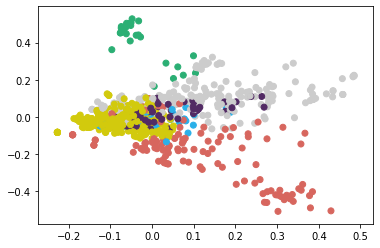

In [107]:
# reflect how important a word is to a document in a collection or corpus
from sklearn.decomposition import PCA
X_dense = X.todense()
pca = PCA(n_components=2).fit(X_dense)
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c=colors)
plt.show()

# To find out what the top keywords

In [76]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)
features = vect.get_feature_names()
print(top_feats_in_doc(X, features, 1, 30))

               features     score
0                    po  0.612837
1                   box  0.365661
2     nfebrmicrosoftcom  0.210135
3                number  0.171847
4                regard  0.160877
5                    fw  0.150961
6               jayaraj  0.146269
7            gunaseelan  0.146269
8               moreira  0.146269
9                 pobox  0.140090
10              recurso  0.125203
11               humano  0.125203
12                   em  0.120410
13               adecco  0.102521
14                   sa  0.099077
15                 2017  0.097954
16                 para  0.096814
17                 june  0.094007
18                   30  0.088960
19              subject  0.079958
20                 sent  0.079554
21                   29  0.078925
22             thursday  0.078311
23                   pm  0.077041
24             informar  0.073135
25  vgujayamicrosoftcom  0.073135
26               fatura  0.073135
27         invoicethank  0.073135
28            

In [77]:
def top_mean_feats(X, features,
 grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)
print(top_mean_feats(X, features, top_n=10))

    features     score
0     expens  0.026385
1    payment  0.025575
2     invoic  0.020772
3    account  0.020400
4      email  0.017089
5     report  0.016868
6    receipt  0.014790
7       bank  0.014237
8  accenture  0.014024
9     approv  0.012883


In [108]:
from sklearn.cluster import KMeans
n_clusters = 5
clf = KMeans(n_clusters=n_clusters, 
            max_iter=100, 
            init='k-means++', 
            n_init=1)
labels = clf.fit_predict(X)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(vec_train[0:1], vec_train).flatten()
print(cosine_sim)

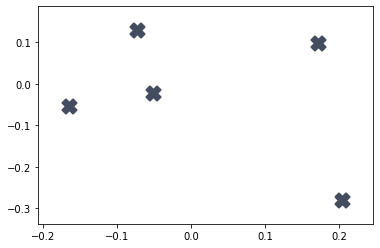

In [109]:

centroids = clf.cluster_centers_
centroid_coords =pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')
plt.show()

In [110]:
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [112]:
top_feats_per_cluster(X, labels, features, 0.1, 25)

[     features     score
 0         nan  0.173077
 1     inquiri  0.165050
 2          cr  0.119514
 3     partner  0.087403
 4    overpaid  0.057692
 5      action  0.050556
 6         sie  0.043527
 7         und  0.035274
 8        atea  0.027403
 9      remind  0.026618
 10        der  0.022944
 11        den  0.022727
 12        die  0.022380
 13     venlig  0.021516
 14        fil  0.021479
 15       åbne  0.021479
 16  vedhæfted  0.021479
 17  pdfformat  0.021479
 18       også  0.021479
 19      klikk  0.021479
 20        med  0.021082
 21        ved  0.020858
 22     hilsen  0.020693
 23        kan  0.020332
 24        dhl  0.019564,      features     score
 0     payment  0.077930
 1     account  0.059799
 2      payabl  0.040645
 3        bank  0.034223
 4   accenture  0.033790
 5          ap  0.028616
 6      ticket  0.027773
 7         tri  0.027507
 8        tier  0.024815
 9      invoic  0.023794
 10      escal  0.023153
 11      updat  0.023040
 12        3cp  0.022022


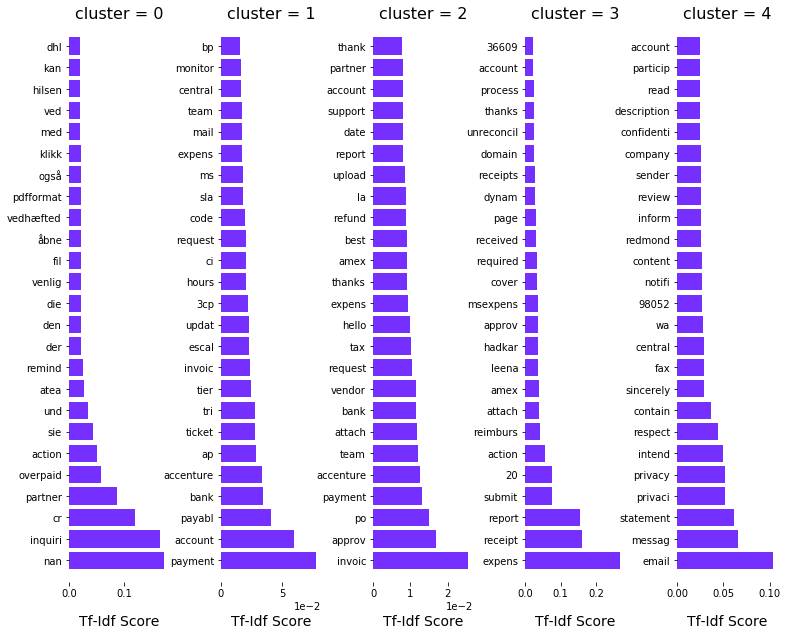

In [111]:
plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))

In [ ]:
#Instead of finding emails related to each other,
#I want to see emails pertaining to a “query” (e.g., a specific keyword or term) that I can specify.

In [55]:
vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
vec_train = vec.fit_transform(df['description'])

query = "invoice"

vec_query = vec.transform([query])

cosine_sim = linear_kernel(vec_query, vec_train).flatten()

In [56]:
related_email_indices = cosine_sim.argsort()[:-10:-1]
print(related_email_indices)

[416 394  28 285 404 471 205 340 125]


In [57]:
# Print out the first result
first_email_index = related_email_indices[0]
print(df['description'].as_matrix()[first_email_index])

pleas find attach pdf copi current citylink invoice if queri regard invoice pleas repli email contact citylink 0800 424 895


C:\Users\v-savrav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.metrics.pairwise import linear_kernel
#from helpers import parse_into_emails

import pandas as pd



class EmailDataset: 
  def __init__(self):
    stopwords = ENGLISH_STOP_WORDS.union(['ect', 'hou', 'com', 'recipient'])
    self.vec = TfidfVectorizer(analyzer='word', stop_words=stopwords, max_df=0.3, min_df=2)
    self.emails = df['description']
    # train on the given email data.
    self.train()
  
  def train(self):
    self.vec_train = self.vec.fit_transform(self.emails)
  
  def query(self, keyword, limit):
    vec_keyword = self.vec.transform([keyword])
    cosine_sim = linear_kernel(vec_keyword, self.vec_train).flatten()
    related_email_indices = cosine_sim.argsort()[:-limit:-1]
    return related_email_indices

  def find_email_by_index(self, i):
    return self.emails.as_matrix()[i]

In [89]:
# I made a new query to find the 50 most related emails matching the keyword salary.
ds = EmailDataset()
results = ds.query('invoice', 10)
# print out the first result.
print(ds.find_email_by_index(results))

['pleas find attach pdf copi current citylink invoice if queri regard invoice pleas repli email contact citylink 0800 424 895'
 'hi – i get error messag tri access httpseinvoicemicrosoftcom approv invoice can help'
 'hi prohelp pleas provid payment date msft invoice 3259312660a msft invoice 5721898926 the payment date still miss releas june 27th thanks thanks alic alic sha samsung semiconductor inc  4085445193  from prohelpus ap mailtoprohelpmicrosoftcom sent tuesday june 27 2017 310 pm to alic sha usapescmicrosoftcom cc ryan dela cruz vincent shaochi ou yang subject re retkt1733406w8t8z3 retkt1677940y6g7k3 msft invoice 5721898785 urgent hi alice thank email pleas note payment releas today list invoice best regards sagar shelar microsoft one financ – us account payabl if feel get respons within accept timefram inadequ response pleas escal to us ap escal  usapescmicrosoftcom sla – 24 hours check invoic statusexpens report status tri msinvoic now need urgent assistance tri cim one stop p

C:\Users\v-savrav\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [114]:
!pip install pyLDAvis
import pyLDAvis

  Stored in directory: C:\Users\v-savrav\AppData\Local\pip\Cache\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Stored in directory: C:\Users\v-savrav\AppData\Local\pip\Cache\wheels\20\5a\d8\1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
